In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
A = np.array([[1, -0.5], [-0.5, 2]])
c = np.array([[-1], [0]])
B = np.array([[1, -2], [1, 4], [5, -76]])
def get_u(u1, u2):
    return np.array([[u1, u2, 1]]).reshape(-1, 1)

# (b)

In [3]:
u = get_u(-2, -3)

x = cp.Variable((2, 1))

Objective = cp.Minimize(cp.quad_form(x, A) + c.T@x)
Constraint = [B@x <= u]
problem = cp.Problem(objective=Objective, constraints=Constraint)

In [4]:
problem.solve()

7.444444444444442

In [5]:
x_1 = x.value[0, 0]
x_2 = x.value[1, 0]

lamda_1 = Constraint[0].dual_value[0, 0]
lamda_2 = Constraint[0].dual_value[1, 0]
lamda_3 = Constraint[0].dual_value[2, 0]

print("x1* = {}, x2* = {}".format(x_1, x_2))
print("lamda1* = {}, lamda2* = {}, lamda3* = {}".format(lamda_1, lamda_2, lamda_3))

x1* = -2.333333333333333, x2* = -0.1666666666666667
lamda1* = 2.8644780383440347, lamda2* = 2.2980324597495883, lamda3* = 0.06749790038127566


# (b)

In [21]:
print("Constraints values :- \n", B@x.value)

Constraints values :- 
 [[-2.]
 [-3.]
 [ 1.]]


# (d)

In [6]:
def solve_prob(u1, u2):
    u = get_u(u1, u2)

    x = cp.Variable((2, 1))

    Objective = cp.Minimize(cp.quad_form(x, A) + c.T@x)
    Constraint = [B@x <= u]
    problem = cp.Problem(objective=Objective, constraints=Constraint)
    return problem.solve()

In [24]:
u1 = np.linspace(-10, 10, 20)
u2 = np.linspace(-10, 10, 20)

X, Y = np.meshgrid(u1, u2)

In [25]:
P = np.zeros((X.shape[0], X.shape[0]))
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        P[i, j] = solve_prob(X[i, j], Y[i, j])

<IPython.core.display.Javascript object>


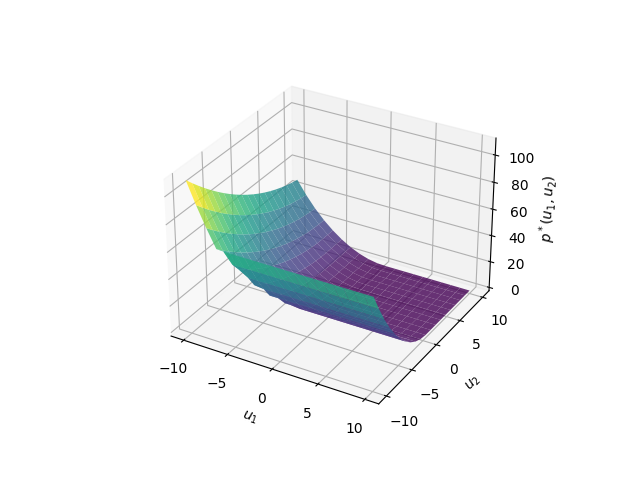

In [26]:
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, P, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha=0.8);

ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')
ax.set_zlabel(r'$p^*(u_1, u_2)$')

plt.savefig('../figs/p.png')
plt.show()

# (f)

In [27]:
du1 = u1[0] - u1[1]
du2 = u2[0] - u2[1]

p_dash = np.diff(np.diff(P, axis=0), axis=1)/(du1*du2)

<IPython.core.display.Javascript object>


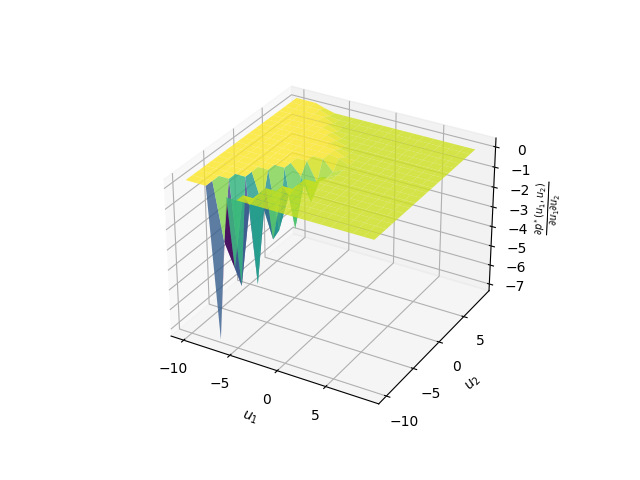

In [28]:
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X[:-1, :-1], Y[:-1, :-1], p_dash, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha=0.8);

ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')
ax.set_zlabel(r'$\frac{\partial p^*(u_1, u_2)}{\partial u_1 \partial u_2}$')
plt.savefig('../figs/p_dash.png')
plt.show()

In [39]:
dx = 1e-8

print('Derivative at u1=-2 is ', (solve_prob(-2+dx, -3) - solve_prob(-2-dx, -3))/(2*dx))
print('Derivative at u2=-3 is ', (solve_prob(-2, -3+dx) - solve_prob(-2, -3-dx))/(2*dx))

Derivative at u1=-2 is  2.8679245644980256
Derivative at u2=-3 is  2.2945856770206774
